<a href="https://colab.research.google.com/github/FelipeGonzalezGarrido/Coding-Dojo/blob/main/3.%20Advanced%20Machine%20Learning/Semana%203%20-%20Introduction%20to%20Deep%20Learning/10.CNN_en_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

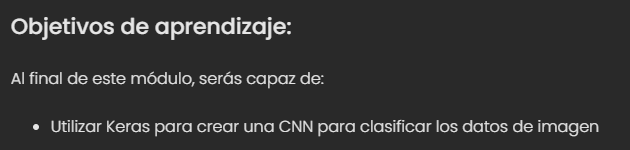

## CNN en Keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

**Importa los datos**

El conjunto de datos que utilizaremos aqui son los datos MNIST que se crean en Keras. Estos datos tienen un monton de digitos escritos a mano del 0 al 9. Esta tarea se trata de clasificar que digito es cada imagen. Esta es una tarea facil para hacer, pero es una muy dificil para una computadora

In [2]:
# Get data - it is already split into training and testing sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

**Escala los datos**

Queremos escalar nuestros datos entre 0 y 1. Esta es una opción común, ya que puede mejorar la velocidad. 

Puesto que nuestros pixeles son valores numéricos entre 0 y 25, simplemente podemos dividir el valor máximo para alcanzar esto. 

In [3]:
# Scale data between 0 and 1
X_train = X_train / 255
X_test = X_test / 255

**Remodela los datos**

Ahora necesitamos remodelar nuestros datos. Actualmente, cada imagen tiene 28 pixeles por 28 pixeles. Puesto que cada píxel solo tiene un valor de color, necesitamos remodelar esto a que sea 28x28x1. Si teníamos valores RBG (rojo, azul y verde), podemos remodelar esto a 28x28x3.

In [5]:
# Reshape data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

**Formato objetivo**

También necesitamos convertir nuestro objetivo a una categoría.

Puesto que nuestro objetivo es **numérico (0, 1, 2, 3, etc.)**,  nuestra computadora va a reorganizar los dígitos más altos como de mayor valor numérico. Sin embargo, todo lo que estamos haciendo en este problema es clasificar cuál imagen es cuál. Un 9 no debe tener más valor que un 1 en este caso. Clasificar un 8 como un 7 no es mejor que clasificarlo como un 2. Ambos están incorrectos.

Afortunadamente, Keras hace esto fácil para utilizar la clase to_categorical.

In [6]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

##¡Ahora podemos crear nuestra CNN!

**Paso 1:** definir nuestra estructura de red

In [7]:
# Step 1: Define our network structure
# Save the input shape
input_shape = X_train.shape[1:4]
input_shape

(28, 28, 1)

In [8]:
# Sequential model
model = Sequential()

¡Ahora podemos agregar nuestras capas ocultas! Utilizaremos una capa convolucional seguida por una capa de agrupación, una capa de aplanamiento y, por último, una capa de salida densa.

Debido a que estamos haciendo una clasificación multiclase, la función de activación softmax se utilizará en nuestra capa de salida.

In [9]:
# Convolutional layer
model.add(Conv2D(filters = 8, # How many filters you want to use
                 kernel_size = 3, # size of each filter
                 input_shape = input_shape)) # What is the shape of your input features (we defined this above)
# Pooling layer
model.add(MaxPooling2D(pool_size = 2)) # Size of pooling
# Flattening layer
model.add(Flatten())
# Output layer
model.add(Dense(10, # How many output possibilities we have
                activation = 'softmax')) # What activation function are you using?

**Paso 2: compilar nuestro modelo**

Puesto que esto es un problema de **clasificación multiclase, utilizaremos la entropía cruzada categórica como función de pérdida.**También podemos rastrear la exactitud a lo largo del tiempo especificando esto en el parámetro de las métricas.

In [10]:
# Step 2: Compile
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

**Paso 3: ajustar nuestro modelo**



In [ ]:
# Step 3: Fit our model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=20)

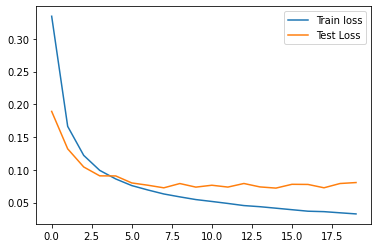

In [14]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

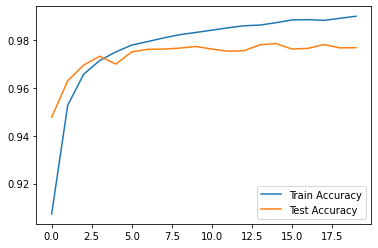

In [15]:
# Visualize the accuracy
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();

###**¡Podemos ver después solo 20 épocas, tenemos una exactitud de prueba de casi el 98 %!**